Aula 4 - Classificação de padrões
Débora Liliane 

In [216]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :4]  
y = iris.target #classificacao

print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

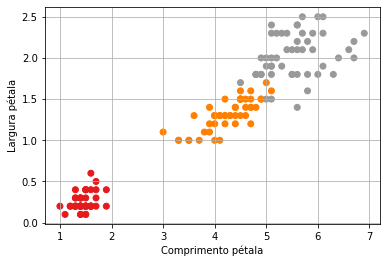

In [256]:

#0 Comprimento da sépala; 1 Largura da sépala; 
#2 comprimento da pétala; 3 Largura da pétala 
#setosa, versicolor, virginica


#comprimento da pétala e largura da pétala
plt.subplots()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento pétala')
plt.ylabel('Largura pétala')
plt.grid(True)
plt.show()

In [257]:
from sklearn.neural_network import MLPClassifier
import numpy
clf4 = MLPClassifier(alpha=0.01,max_iter=2000)
X4 = iris.data[:,2:3]

#treinamento (até 40 de cada classe)
yt4=numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt4 = numpy.concatenate([X4[:40,:], X4[51:90,:], X4[101:140,:]])
clf4.fit(xt4, yt4)  

#validacão (dados restantes)
yv4=numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv4 = numpy.concatenate([X4[40:50,:], X4[90:100,:], X4[140:150,:]])
yp4= clf4.predict(xv4)
print(yp4)
print(yv4)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [259]:
from collections import Counter
comp4 = yp4 == yv4
c= Counter(comp)
print(c)
#taxa de acerto
print(c[1]/(c[0]+c[1]))

Counter({True: 30})
1.0


Matriz de confusão

Matriz de confusão, sem normalizar
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Matriz de confusão normalizada
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


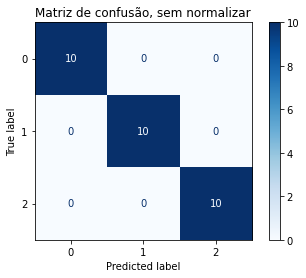

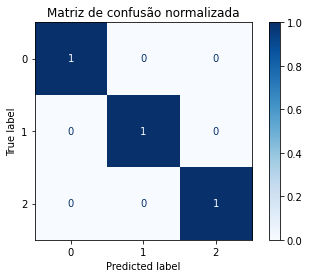

In [260]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, xv4, yv4,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [261]:
from sklearn.metrics import classification_report
print(classification_report(yv4, yp4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



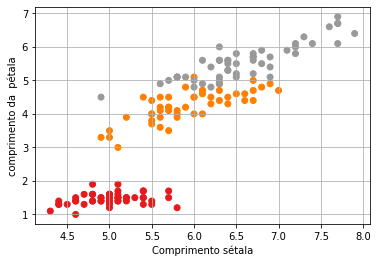

In [262]:
#0 Comprimento da sépala; 1 Largura da sépala; 
#2 comprimento da pétala; 3 Largura da pétala 
#setosa, versicolor, virginica

#comprimento da sépala e comprimento da pétala
plt.subplots()
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento sétala')
plt.ylabel('comprimento da  pétala')
plt.grid(True)
plt.show()

In [263]:
clf3 = MLPClassifier(alpha=0.01,max_iter=2000)
X3 = iris.data[:,[0,2]]

#treinamento (até 40 de cada classe)
yt3=numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt3 = numpy.concatenate([X3[:40,:], X3[51:90,:], X3[101:140,:]])
clf3.fit(xt3, yt3)  

#validacão (dados restantes)
yv3=numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv3 = numpy.concatenate([X3[40:50,:], X3[90:100,:], X3[140:150,:]])
yp3=clf3.predict(xv3)
print("Predito", yp3)
print("Real ", yv3)


Predito [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2]
Real  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [223]:
comp = yp3 == yv3
c= Counter(comp)
print(c)
#taxa de acerto
print(c[1]/(c[0]+c[1]))

Counter({True: 29, False: 1})
0.9666666666666667


Matriz de confusão, sem normalizar
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Matriz de confusão normalizada
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]]


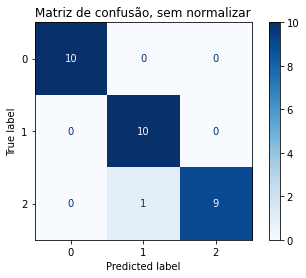

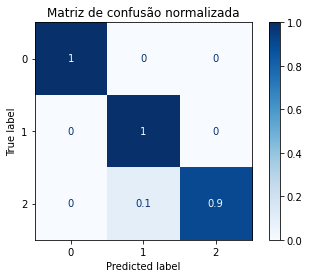

In [264]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, xv3, yv3,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [214]:
print(classification_report(yv3, yp3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [21]:
#Outro algoritmos de classificação #knn

In [265]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

X2 = iris.data[:, 2:3]

#treinamento (até 40 de cada classe)
yt2=numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt2 = numpy.concatenate([X2[:40,:], X2[51:90,:], X2[101:140,:]])
knn.fit(xt2, yt2)  

#validacão (dados restantes)
yv2= numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv2 = numpy.concatenate([X2[40:50,:], X2[90:100,:], X2[140:150,:]])
yp2= knn.predict(xv2)
print("Predito", yp2)
print("Real ", yv2)




Predito [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]
Real  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [266]:
comp2 = yp2 == yv2
c= Counter(comp2)
print(c)
#taxa de acerto
print(c[1]/(c[0]+c[1]))

Counter({True: 29, False: 1})
0.9666666666666667


Matriz de confusão, sem normalizar
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Matriz de confusão normalizada
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]]


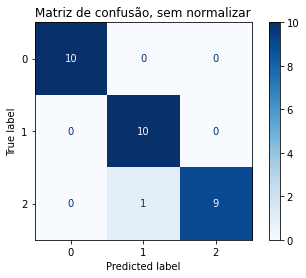

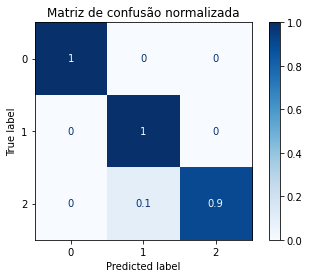

In [267]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, xv2, yv2,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    

plt.show()

In [268]:
print(classification_report(yv2, yp2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)

X5 = iris.data[:, [0,2]]

#treinamento (até 40 de cada classe)
yt5=numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt5 = numpy.concatenate([X5[:40,:], X5[51:90,:], X5[101:140,:]])
knn5.fit(xt5, yt5)  

#validacão (dados restantes)
yv5= numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv5 = numpy.concatenate([X5[40:50,:], X5[90:100,:], X5[140:150,:]])
yp5= knn5.predict(xv5)
print("Predito", yp5)
print("Real ", yv5)


Predito [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2]
Real  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [270]:
comp5 = yp5 == yv5
c= Counter(comp5)
print(c)
#taxa de acerto
print(c[1]/(c[0]+c[1]))

Counter({True: 29, False: 1})
0.9666666666666667


Matriz de confusão, sem normalizar
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Matriz de confusão normalizada
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]]


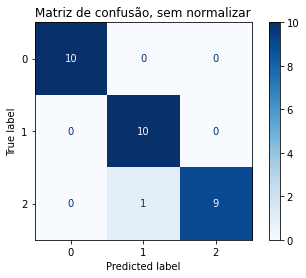

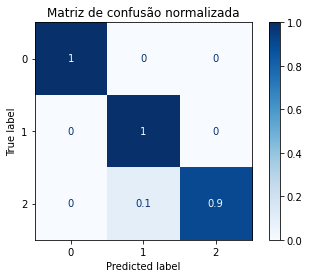

In [244]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn5, xv5, yv5,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    

plt.show()

In [271]:
print(classification_report(yv5, yp5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

